# <strong>Tensor Flow Deep Learning
<strong>딥러닝과 텐서플로의 만남</strong>
1. <strong>규칙기반 알고리즘</strong> : for/ if/ boolean - 분명한 기준이 존재한 경우 효과적
2. <strong>머신러닝 알고리즘</strong> : end-to-end 학습

<br>
## <strong>1 Jupyter Notebook
쥬피터 노트북
### <strong> 01 tensor graph 설계
Tensor() : graph 구조를 결과로 출력한다

In [1]:
# constant : 상수, 문자형태도 입력가능
import tensorflow as tf
hello = tf.constant("Hello, Tensorflow!")
print(hello)

# 'rank'  : Tensor 차원 수
# 'shape' : Tensor 구조를 설명
# [1., 2., 3.]                    : 'rank' 1차원 tensor, 'shape' [3]     (인덱스 3)
# [[1., 2., 3.], [4., 5., 6.]]    : 'rank' 2차원 tensor, 'shape' [2,3]   (2차원 인덱스 3)
# [[[1., 2., 3.]],[[7., 8., 9.]]] : 'rank' 3차원 tensor, 'shape' [2,1,3] (3차원 2x1x3)

/home/markbaum/Python/python36/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Tensor("Const:0", shape=(), dtype=string)


In [2]:
a = tf.constant(10)
b = tf.constant(32)
c = tf.add(a,b)
print(c)

Tensor("Add:0", shape=(), dtype=int32)


### <strong> 02 지연실행
lazy evaluation : graph 구조를 그린 뒤, Tensor 연산을 실행한다 

In [3]:
sess = tf.Session()
print(sess.run(hello))
print(sess.run([a,b,c]))
sess.close()

b'Hello, Tensorflow!'
[10, 32, 42]


<br>
## <strong>2 PlaceHolder 와 변수
parameter 를 설정
1. <strong>scalar</strong> : 크기 값  <strong>ex)1</strong>
2. <strong>vector</strong> : 화살표 1개 <strong>ex) [1,2,3] list 1개</strong> 열벡터로 행벡터도 존재한다
3. <strong>matrix</strong> : 화살표들의 여러 묶음 <strong>ex) [[1,2],[3,4]]</strong>
4. <strong>shape</strong> : 다차원 자료를 x 형태로 표시

https://tensorflowkorea.gitbooks.io/tensorflow-kr/content/g3doc/resources/dims_types.html

https://ghebook.blogspot.kr/2011/06/tensor.html

<img src="https://cdn-images-1.medium.com/max/1600/1*7aXSK5bdSFO9WZMswU5v1w.png" align="left" width="700">

In [4]:
# Tensorflow 의 경직성을 입력 부분에 한해서 
X = tf.placeholder(tf.float32, [None, 3]) # [row dim, col dim] 컬럼 3인 데이터를 설정 
print(X)

Tensor("Placeholder:0", shape=(?, 3), dtype=float32)


In [5]:
# tf.Variable      : 그래프를 계산하면서 자료를 최적화
# tf.random_normal : 초기값을 정규분포 랜덤 값으로 초기화
W = tf.Variable(tf.random_normal([3, 2])) # [row dim, col dim]
b = tf.Variable(tf.random_normal([2, 1]))
expr = tf.matmul(X, W) + b # 가설함수 : 1차원 선형모델을 정의한다
# ------------ graph 설계 완료 --------------------

<img src="http://cfile2.uf.tistory.com/image/226F5B3952B78BC7123696" align='left'>

In [6]:
# ------------ lazy evaluation -----------------
sess = tf.Session()
x_data = [[1, 2, 3], [4, 5, 6]]
sess.run(tf.global_variables_initializer()) # Variable 초기화

In [7]:
# placeholder 에 입력한 값
print("x_data : {},\n\nW(weight) : {},\n\nb(bias) : {},\n\nexpr(예측) : {}".format(
    x_data, sess.run(W), sess.run(b), 
    # expr 실행 : feed_dict = 'X'매개변수와 입력값 연결 {dict 을 활용}
    sess.run(expr, feed_dict={X: x_data})))
sess.close()

x_data : [[1, 2, 3], [4, 5, 6]],

W(weight) : [[-0.30860955  0.4240455 ]
 [-0.26957437  0.26266518]
 [ 0.96613806 -0.3373982 ]],

b(bias) : [[ 0.11888806]
 [-1.45605338]],

expr(예측) : [[ 2.16954398  0.05606929]
 [ 1.75846469 -0.47093475]]


<br>
## <strong>3 선형회귀 모델을 구현
선형회귀 : x 와 y 의 관계를 파악한다

In [8]:
# import tensorflow as tf
x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.random_uniform([1], -1.0, 1.0))

In [9]:
# name : 값의 추적을 위해 이름을 설정
# 변수, 연산함수에도 이름을 지정할 수 있다.
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")
print(X)
print(Y)   # tensor 에도 이름이 붙여져서 출력

Tensor("X:0", dtype=float32)
Tensor("Y:0", dtype=float32)


In [10]:
# W 와 X 가 Matrix가아니므로, tf.matmul 아닌 기본 곱셈 기호를 사용
hypothesis = W * X + b          # 가설 수식: y = W * x + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))  # 예측에서 실제를 뺀, 제곱값들의 평균 (평균제곱오차)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1) # 경사하강법
train_op  = optimizer.minimize(cost)                             # 비용 최소화 목표

In [11]:
with tf.Session() as sess:  # sess.run : 1) train_op 와 cost 그래프 계산, 
                            #            2) 값을 feed_dict 를 통해 전달
    sess.run(tf.global_variables_initializer())  # 세션을 생성하고 초기화합니다.
    for step in range(100):                      # 최적화를 100번 수행
        _, cost_val = sess.run([train_op, cost], feed_dict={X: x_data, Y: y_data})
        if step % 20 == 0: 
            print(step, cost_val, sess.run(W), sess.run(b))

    # 모델의 성능평가
    print("\n=== Test ===\nX: 5, Y:{} \nX: 2.5, Y:{}".format(
        sess.run(hypothesis, feed_dict={X: 5}),     # X 가 5일때 Y를 예측
        sess.run(hypothesis, feed_dict={X: 2.5})))  # X 가 2.5일때 Y를 예측

0 6.18734 [ 0.65653455] [ 1.06382]
20 0.0589633 [ 0.72475517] [ 0.62569624]
40 0.0222779 [ 0.83081353] [ 0.38460067]
60 0.00841721 [ 0.89600509] [ 0.23640491]
80 0.00318025 [ 0.93607676] [ 0.14531253]

=== Test ===
X: 5, Y:[ 4.89022064] 
X: 2.5, Y:[ 2.49087048]


<br>
## <strong>4 기본 신경망 구현
뉴런 신경망을 연결한 딥러닝 알고리즘 
1. ex) $ y = Sigmoid(X * W + b) $
1. <strong>인공뉴런</strong> : <strong>weight</strong>(가중치) 와 <strong>활성화 함수</strong>의 연결로 구성
1. <strong>activation function</strong> (활성화 함수) : Sigmoid, ReLU, tanh

<img src="https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-08-at-11-53-41-am.png?w=748" align="left" 
\width="700">

1. 역전파 (backpropagation) : 출력층 결과를 입력층까지 역으로 전파하며 계산하여 최적화 과정이 훨씬 유용

<img src="https://matthewmazur.files.wordpress.com/2018/03/output_1_backprop-4.png?w=525" align="left">

### <strong>01 간단한 분류모델 만들기 (단일 신경망 모델)
1. RBM (Restricted Boltzmann Machine) : 제한된 볼트만 머신

<img src="https://deeplearning4j.org/img/neural-network-regression.png" align="left">
<img arc="http://imonad.com/rbm/restricted-boltzmann-machine/rbm2.png" align="left">

In [12]:
# 털과 날개 데이터로, 포유류/조류 분류 신경망 모델 생성
import tensorflow as tf
import numpy as np
x_data = np.array([[0, 0], [1, 0], [1, 1], 
                   [0, 0], [0, 0], [0, 1]])   # 0: 털, 1: 날개 

# one-hot-encoding : 기타([1, 0, 0]), 포유류([0, 1, 0]), 조류([0, 0, 1])
y_data = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1], 
                   [1, 0, 0], [1, 0, 0], [0, 0, 1]])

In [13]:
# 1. 신경망 모델 구성 graph 
# X, Y 매개변수에 실측값을 입력하여 학습을 실행 ---------------------------------
X = tf.placeholder(tf.float32, [None,2])
Y = tf.placeholder(tf.float32, [None,3])

# 신경망 (2차원) : [Train 데이터 특성, Target 레이블] -> [2, 3]
# 자료 x, y 모두 6차원으로 동일해야 한다
W = tf.Variable(tf.random_uniform([2, 3], -1., 1.)) # tf.random_uniform : 균등분포 난수를 대입 (-1 ~ 1)
b = tf.Variable(tf.zeros([3]))                      # bias : [열벡터] 각 레이어의 아웃풋 갯수로 설정

In [14]:
L = tf.add(tf.matmul(X, W), b)  # 신경망에 가중치 W과 편향 b을 적용합니다
L = tf.nn.relu(L)               # ReLU 함수를 적용
model = tf.nn.softmax(L)        # softmax 함수 : 전체 합이 1인 확률로 변환
                                # 예) [8.04, 2.76, -6.52] -> [0.53 0.24 0.23]

In [15]:
# 교차 엔트로피 (Cross-Entropy) : 모델의 손실값 계산
# cf) axis 옵션 : 평균 계산하는 방향(row)을 정의 (axis 이 없으면 -1.09 같은 총합 스칼라를 출력)
#        Y         model           Y * tf.log(model)    reduce_sum(axis=1)
# 예) [[1 0 0]  [[0.1 0.7 0.2]  -> [[-1.0  0    0]   -> [-1.0, -0.09]
#     [0 1 0]]  [0.2 0.8 0.0]]     [ 0   -0.09 0]]

# reduce_mean : axis = 1 차원의 데이터를 1개로 만들어서 차원을 축소한다
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(model), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train_op = optimizer.minimize(cost)

In [16]:
# 2. 신경망 모델 Train
# 훈련 모델은 'model' 객체에 저장 -------------------------------------------------
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for step in range(100):
    sess.run(train_op, feed_dict={X: x_data, Y: y_data})
    if (step + 1) % 20 == 0:
        print(step + 1, sess.run(cost, feed_dict={X: x_data, Y: y_data}))

# 결과 확인  0: 기타 1: 포유류, 2: 조류
# tf.argmax: 예측값과 실제값의 행렬에서 tf.argmax 를 이용해 가장 큰 값을 가져옵니다.
# 예) [[0 1 0] [1 0 0]] -> [1 0]
#    [[0.2 0.7 0.1] [0.9 0.1 0.]] -> [1 0]

20 0.940567
40 0.934864
60 0.929366
80 0.923982
100 0.918751


In [17]:
# 3. 신경망 모델 검증 'model' -----------------------------------------------------
# model 의 테스트
prediction = tf.argmax(model, 1) # test 결과, 동일한 훈련 데이터 중 '최댓값 컬럼'을 출력
target = tf.argmax(Y, 1)         # Y 타겟 데이터중, 동일한 index 중 '최댓값 컬럼'을 출력
print('예측값:', sess.run(prediction, feed_dict={X: x_data}))
print('실제값:', sess.run(target,     feed_dict={Y: y_data}))

# Accuracy 측정 (model 테스트 결과를 활용)
is_correct = tf.equal(prediction, target)  # tf.equal(데이터, 대조군) : 일치여부를 확인 (boolean)
print(is_correct)                          # 일치 결과를 True/ False 로 출력

accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))  # True/ False를 확률로 계산
print('정확도: %.2f' % sess.run(accuracy * 100, feed_dict={X: x_data, Y: y_data}))

예측값: [1 2 2 1 1 2]
실제값: [0 1 2 0 0 2]
Tensor("Equal:0", shape=(?,), dtype=bool)
정확도: 33.33


### <strong>02 심층 신경망 모델 만들기 (Deep Learning)
1. Deep Learning : 위의 신경망에 W(가중치)와 b(편향)값을 추가한다

<img src="https://www.hindawi.com/journals/aai/2011/686258.fig.001.jpg" align="left">

http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=8,3&seed=0.18162&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

In [18]:
# 신경망의 레이어를 여러개로 구성하여 딥러닝 모델을 구현
# 1. 입력 텐서를 정의한다
import tensorflow as tf
import numpy as np

x_data = np.array([[0, 0], [1, 0], [1, 1], 
                   [0, 0], [0, 0], [0, 1]])   # 0: 털, 1: 날개  (6x2)

# one-hot-encoding : 기타([1, 0, 0]), 포유류([0, 1, 0]), 조류([0, 0, 1])
y_data = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1], 
                   [1, 0, 0], [1, 0, 0], [0, 0, 1]])

In [19]:
# 2. 모델의 매개변수 타입과 성격을 정의
# 1) 데이터 입력 Tensor 의 shape를 정의 : 그런데 [None, 2] 없이도 잘 실행되더라
#  (1) weight : 가중치의 차원 [특성, 히든 레이어의 뉴런갯수]
#  (2) bias   : 각 레이어의 아웃풋 갯수로 설정
X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 3])

# 2) 학습할 신경망 shape를 정의 : Hidden Layer 에서 10개의 신경망을 사용
#  (1) 첫번째 가중치의 차원 : [입력 tensor - 2, 히든 layer 뉴런의 수 - 10]
#      b1 은 히든 레이어의 뉴런 갯수 '10'를 설정
W1 = tf.Variable(tf.random_uniform([2, 10], -1., 1.))
b1 = tf.Variable(tf.zeros([10]))

#  (2) 두번째 가중치의 차원 : [히든 layer 신경망의 수 - 10, target tensor - 3]
#      b2 는 최종 결과값, 분류 갯수 '3'을 설정
W2 = tf.Variable(tf.random_uniform([10, 3], -1., 1.))
b2 = tf.Variable(tf.zeros([3]))

In [20]:
# 신경망의 히든 레이어에 가중치 W1과 편향 b1을 적용합니다
L1 = tf.add(tf.matmul(X, W1), b1)
L1 = tf.nn.relu(L1)

# 최종적인 아웃풋을 계산 - 히든레이어에 두번째 신경망의 W2, b2를 적용, 3개의 출력값
model = tf.add(tf.matmul(L1, W2), b2)

In [21]:
# 3. 손실함수를 정의한다
# 텐서플로우의 기본적 '크로스 엔트로피'를 활용
cost = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=model))
optimizer = tf.train.AdamOptimizer(learning_rate = 0.01)
train_op = optimizer.minimize(cost)

In [22]:
# 4. 모델을 학습한다
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for step in range(100):
    sess.run(train_op, feed_dict={X: x_data, Y: y_data})
    if (step + 1) % 10 == 0:
        print(step + 1, sess.run(cost, feed_dict={X: x_data, Y: y_data}))

10 0.818313
20 0.626637
30 0.491294
40 0.390916
50 0.308921
60 0.242926
70 0.190848
80 0.148578
90 0.113751
100 0.0867538


In [23]:
# 5. 모델의 평가 : { 0: 기타 1: 포유류, 2: 조류 }
prediction = tf.argmax(model, 1)
target = tf.argmax(Y, 1)
print('예측값:', sess.run(prediction, feed_dict={X: x_data}))
print('실제값:', sess.run(target, feed_dict={Y: y_data}))

is_correct = tf.equal(prediction, target)
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도: %.2f' % sess.run(accuracy * 100, feed_dict={X: x_data, Y: y_data}))

예측값: [0 1 2 0 0 2]
실제값: [0 1 2 0 0 2]
정확도: 100.00


### <strong>03 Word to Vector
워드 to Vector

https://www.tensorflow.org/tutorials/word2vec

<img src="https://www.tensorflow.org/images/linear-relationships.png" align="left" width='600'>

In [24]:
# Word2Vec 모델을 간단하게 구현해봅니다.
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# matplot 한글 설정
matplotlib.rc('font', family='D2Coding')

In [25]:
# 단어 벡터를 분석해볼 임의의 문장들
sentences = ["나 고양이 좋다","나 강아지 좋다","나 동물 좋다","강아지 고양이 동물","강아지 고양이 좋다",
             "여자친구 고양이 강아지 좋다","고양이 생선 우유 좋다","강아지 생선 싫다 우유 좋다",
             "강아지 고양이 눈 좋다","나 여자친구 좋다","여자친구 나 싫다","여자친구 나 영화 책 음악 좋다",
             "나 게임 만화 애니 좋다","고양이 강아지 싫다",]

word_list = " ".join(sentences).split() # 문장을 전부 합친다
word_list = list(set(word_list))        # set() : 고유 단어 리스트를 생성
word_dict = {w: i for i, w in enumerate(word_list)}  # 문자들의 인덱스 '연관배열'
word_index = [word_dict[word] for word in word_list] # 단어를 참조 할 '인덱스 배열'생성

In [26]:
# 윈도우 사이즈를 1 로 하는 skip-gram 모델을 만듭니다.
# 예) 나 게임 만화 애니 좋다
#   -> ([나, 만화], 게임), ([게임, 애니], 만화), ([만화, 좋다], 애니)
#   -> (게임, 나), (게임, 만화), (만화, 게임), (만화, 애니), (애니, 만화), (애니, 좋다)
skip_grams = []

In [27]:
for i in range(1, len(word_index) - 1):
    
    target = word_index[i]                            # 중심단어 추출
    context = [word_index[i - 1], word_index[i + 1]]  # 중심단어 앞, 뒤 단어를 list로 추출
    # (target, context[0]), (target, context[1])..
    for w in context:
        skip_grams.append([target, w])   # [[target index-1, target index+1], target]

In [42]:
len(word_list)

16

In [41]:
len(skip_grams)

28

In [28]:
# skip-gram 데이터에서 무작위로 데이터를 뽑아 
# 입력값과 출력값의 배치 데이터를 생성하는 함수
def random_batch(data, size):
    random_inputs, random_labels = [], []
    random_index = np.random.choice(range(len(data)), size, replace=False)
    for i in random_index:
        random_inputs.append(data[i][0])     # target
        random_labels.append([data[i][1]])   # context word
    return random_inputs, random_labels

In [29]:
# 옵션 설정
training_epoch = 300  # 학습을 반복할 횟수
learning_rate = 0.1   # 학습률
batch_size = 20       # 한 번에 학습할 데이터의 크기

# 단어 벡터를 구성할 임베딩 차원의 크기 : x, y 그래프 2 개의 값만 출력
embedding_size = 2
# word2vec 학습을 위한 nce_loss 함수의 샘플링 크기를 정의 (단) batch_size 보다 작아야 한다)
num_sampled = 15
voc_size = len(word_list) # 총 단어 갯수

In [30]:
# 신경망 모델 구성
inputs = tf.placeholder(tf.int32, shape=[batch_size])
# tf.nn.nce_loss : 출력값을 [batch_size, 1]로 구성해야 한다
labels = tf.placeholder(tf.int32, shape=[batch_size, 1])
# word2vec 모델의 결과 값인 임베딩 벡터를 저장
# 1)총 단어 갯수, 2) 임베딩 갯수의 크기  두 개의 차원을 갖는다
embeddings = tf.Variable(tf.random_uniform([voc_size, embedding_size], -1.0, 1.0))

In [31]:
# 임베딩 벡터의 차원에서 학습할 입력값에 대한 행들을 뽑아옵니다.
# 예) embeddings     inputs    selected
#    [[1, 2, 3]  -> [2, 3] -> [[2, 3, 4]
#     [2, 3, 4]                [3, 4, 5]]
#     [3, 4, 5]
#     [4, 5, 6]]
selected_embed = tf.nn.embedding_lookup(embeddings, inputs)
# nce_loss 함수에서 사용할 변수들을 정의
nce_weights = tf.Variable(tf.random_uniform([voc_size, embedding_size], -1.0, 1.0))
nce_biases = tf.Variable(tf.zeros([voc_size]))

# nce_loss 함수를 직접 구현하려면 매우 복잡하지만,
# 함수를 텐서플로우가 제공하므로 그냥 tf.nn.nce_loss 함수를 사용하기만 하면 됩니다.
loss = tf.reduce_mean(
            tf.nn.nce_loss(nce_weights, nce_biases, labels, selected_embed, num_sampled, voc_size))
train_op = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [32]:
# 신경망 모델 학습
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    for step in range(1, training_epoch + 1):
        batch_inputs, batch_labels = random_batch(skip_grams, batch_size)
        _, loss_val = sess.run([train_op, loss],
                               feed_dict={inputs: batch_inputs,
                                          labels: batch_labels})
        if step % 50 == 0:
            print("loss at step ", step, ": ", loss_val)

    # matplot 으로 출력하여 시각적으로 확인해보기 위해
    # 시각화를 위해 임베딩 벡터의 결과 값을 계산하여 저장
    # with 구문 안에서는 sess.run 대신 .eval() 를 사용 가능하다
    trained_embeddings = embeddings.eval()

loss at step  50 :  3.2309
loss at step  100 :  3.0807
loss at step  150 :  2.98974
loss at step  200 :  2.73107
loss at step  250 :  2.89572
loss at step  300 :  2.65647


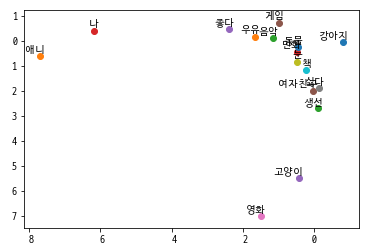

In [33]:
# 임베딩된 Word2Vec 결과 확인 : 단어간의 인접관계를 나타낸다
for i, label in enumerate(word_list):
    x, y = trained_embeddings[i]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')
plt.show()